# COMP40370 Practical 1 (Part B)

***

### Imports

In [1]:
import pandas as pd
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

***

## Question 1: Outliers removal and transformation

***

> Read in diabetes.csv

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
783,8,107,80.0,0,0,24.6,0.856,34,0
784,13,158,114.0,0,0,42.3,0.257,44,1
785,2,121,70.0,32,95,39.1,0.886,23,0
786,7,129,68.0,49,125,38.5,0.439,43,1


####  &#x2611; A. What are the kurtosis and skewness values of the Insulin attribute?

In [3]:
print("Insulin Kurtosis: %f." % (kurtosis(df['Insulin'])))
print("Insulin Skewness: %f." % (skew(df['Insulin'])))

Insulin Kurtosis: 7.212285.
Insulin Skewness: 2.264073.


Kurtosis measures how symmetrical the values are and skewness measures how skewed either way (positively or negatively) values that aren't symmetrical are. 

The pandas kurtosis() formula is: kurtosis = (sum((x - mean) ** 4) / n) / (standard deviation ** 4). 
The pandas skew() formula is: skewness = (3 * (mean - median)) / standard deviation

####  &#x2611; B. Filter the dataframe and select only the rows where Insulin is not equal to 0, and use the new version (filtered dataframe) for the rest of the practical



In [4]:
df_2 = df.copy() #DF_2 will contain all columns from DF, but rows where Insulin equals zero will be removed
df_2 = df_2[df_2['Insulin'] != 0]
df_2 = df_2.reset_index(drop=True)
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,94,28.1,0.167,21,0
1,0,137,40.0,35,168,43.1,2.288,15,1
2,3,78,50.0,32,88,31.0,0.248,26,1
3,2,197,70.0,45,543,30.5,0.158,53,1
4,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205,33.2,0.591,25,0
400,1,140,74.0,26,180,24.1,0.828,23,0
401,1,144,82.0,46,180,46.1,0.335,46,1
402,2,121,70.0,32,95,39.1,0.886,23,0


In [5]:
print("df_2 has %d less rows than the original dataframe (df)." % (df.shape[0]-df_2.shape[0]))

df_2 has 384 less rows than the original dataframe (df).


The dataframe "df_2" has now been created in order to preserve the original dataset. All rows with an Insulin value of 0 have been removed in this new dataframe. A total of 384 rows were removed.

#### &#x2611; C. Draw the histogram of Insulin column along with kernel density estimation (KDE) curb.

In [6]:
print("Average Insulin Level is: %d" % (df_2['Insulin'].mean()))

Average Insulin Level is: 155


/home/g2square/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/g2square/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


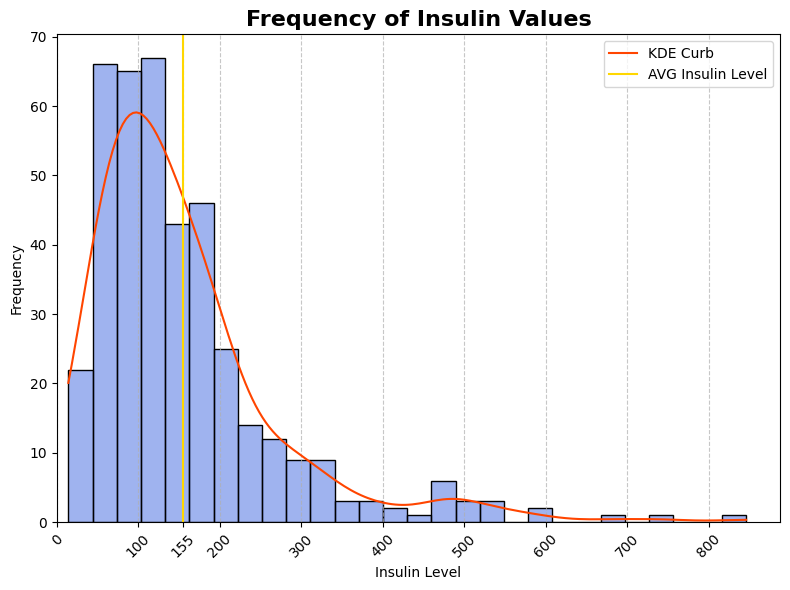

In [7]:
# Plot 1
fig_1, ax_1 = plt.subplots(figsize=(8,6)) #Subplots

ax_1 = sns.histplot(df_2["Insulin"], color='royalblue', kde=True) #Define Histogram 
ax_1.lines[0].set_color('orangered') #Set the first line's (KDE curb) color
ax_1.lines[0].set_label('KDE Curb') #
ax_1.axvline(df_2['Insulin'].mean(), color='gold', label='AVG Insulin Level')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.title('')
plt.legend()
ax_1.set_title('Frequency of Insulin Values', fontweight='bold', fontsize=16)
ax_1.set_xlim(left=0)
ax_1.grid(axis='x', linestyle='--', alpha=0.7)
xticks = [0, 100, df_2['Insulin'].mean(), 200, 300, 400, 500, 600, 700, 800]
xtick_labels = ['0', '100', '155', '200', '300', '400', '500', '600', '700', '800']
plt.xticks(xticks, xtick_labels, rotation=45)
fig_1.tight_layout()
plt.show()

We find that the average Insulin Level is 155. While not in the center of the KDE curb, the mean line still appears pretty close to the most frequent insulin levels. This histogram shows that the majority of the patients records have insulin values in the sub 200 range. 

#### &#x2611; D. Identify outliers of Insulin using Inter Quartile Range (IQR) approach and impute them with lower band and upper band values appropriately (any outliers above the upper band, replace it with the value of upper band, and any outliers below the lower band, replace it with the value of the lower band). Then draw the histogram again to observe the difference


> Identify outliers using IQR approach. 


In [8]:
Insulin_Q1 = df_2['Insulin'].quantile(0.25)
Insulin_Q3 = df_2['Insulin'].quantile(0.75)
Insulin_IQR = Insulin_Q3 - Insulin_Q1
print(Insulin_IQR)

113.0


In [9]:
threshold = 1.5 #Normal threshold

#Find the Lower and Upper Bounds
Insulin_lower_bound = Insulin_Q1 - threshold * Insulin_IQR
Insulin_upper_bound = Insulin_Q3 + threshold * Insulin_IQR

#Identify and store Outliers
Insulin_outliers = df_2[(df_2['Insulin'] < Insulin_lower_bound) | (df_2['Insulin'] > Insulin_upper_bound)]

print("Lower Bound is: %f" % (Insulin_lower_bound))
print("Upper Bound is: %f" % (Insulin_upper_bound))
print("I found %d outliers after using the IQR approach." % (len(Insulin_outliers)))

Lower Bound is: -92.500000
Upper Bound is: 359.500000
I found 25 outliers after using the IQR approach.


> Replace upper and lower bands with values of upper and low bands. 

In [10]:
df_3 = df_2.copy() #DF_3 will contain Insulin outliers with reassigned lower/upper bounds
df_3 = df_3.reset_index(drop=True)
df_3['Insulin'] = df_3['Insulin'].apply(lambda x: Insulin_lower_bound if x < Insulin_lower_bound else (Insulin_upper_bound if x > Insulin_upper_bound else x))
df_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,94.0,28.1,0.167,21,0
1,0,137,40.0,35,168.0,43.1,2.288,15,1
2,3,78,50.0,32,88.0,31.0,0.248,26,1
3,2,197,70.0,45,359.5,30.5,0.158,53,1
4,1,189,60.0,23,359.5,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205.0,33.2,0.591,25,0
400,1,140,74.0,26,180.0,24.1,0.828,23,0
401,1,144,82.0,46,180.0,46.1,0.335,46,1
402,2,121,70.0,32,95.0,39.1,0.886,23,0


> Draw a new histogram

In [16]:
print("Average Insulin Level is: %d" % (df_3['Insulin'].mean()))

Average Insulin Level is: 146


/home/g2square/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/g2square/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


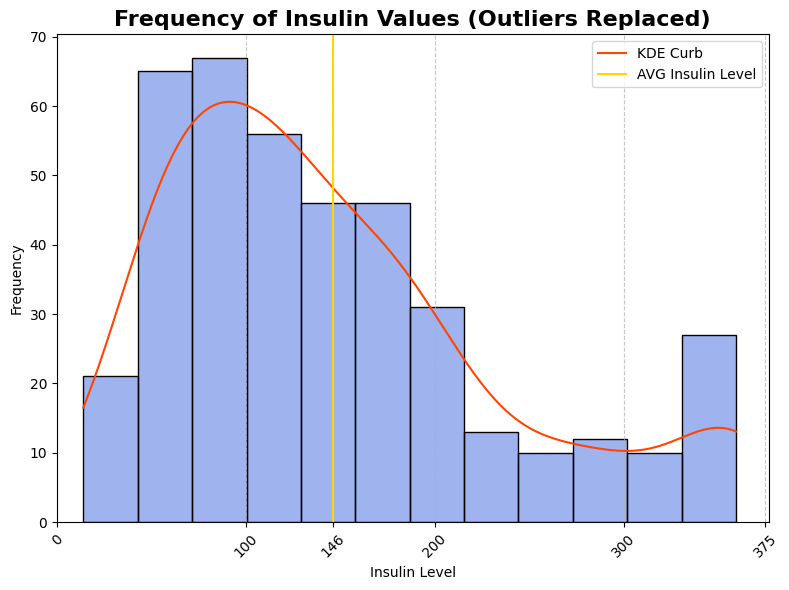

In [19]:
# Plot 2: (Outliers replaced with bound values)
fig_2, ax_2 = plt.subplots(figsize=(8,6))

ax_2 = sns.histplot(df_3["Insulin"], color='royalblue', kde=True)
ax_2.lines[0].set_color('orangered') #Set the first line's (KDE curb) color
ax_2.lines[0].set_label('KDE Curb') #
ax_2.axvline(df_3['Insulin'].mean(), color='gold', label='AVG Insulin Level')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.title('')
plt.legend()
ax_2.set_title('Frequency of Insulin Values (Outliers Replaced)', fontweight='bold', fontsize=16)
ax_2.set_xlim(left=0)
ax_2.grid(axis='x', linestyle='--', alpha=0.7)
xticks = [0, 100, df_3['Insulin'].mean(), 200, 300, 375]
xtick_labels = ['0', '100', '146', '200', '300', '375']
plt.xticks(xticks, xtick_labels, rotation=45)
fig_2.tight_layout()
plt.show()


In part D, I identified the outliers and replaced them with the lower and upper bound values. This in effect "normalizes" the values in this column so that there are no outliers. 

#### &#x2611; E. Transform Insulin column using $\log_e$(x+1) formula to make the Insulin values follow the normal distribution.

In [24]:
df_4 = df_3.copy() #df_4 will have an Insulin column with a log formula applied to it
df_4 = df_4.reset_index(drop=True)
df_4['Insulin'] = df_4['Insulin'].apply(lambda x: np.log(x + 1))
df_4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,4.553877,28.1,0.167,21,0
1,0,137,40.0,35,5.129899,43.1,2.288,15,1
2,3,78,50.0,32,4.488636,31.0,0.248,26,1
3,2,197,70.0,45,5.887492,30.5,0.158,53,1
4,1,189,60.0,23,5.887492,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,5.327876,33.2,0.591,25,0
400,1,140,74.0,26,5.198497,24.1,0.828,23,0
401,1,144,82.0,46,5.198497,46.1,0.335,46,1
402,2,121,70.0,32,4.564348,39.1,0.886,23,0


In an attempt to normalize values even greater in the insulin column, I have applied $\log_e$(x+1) to the Insulin column. 

#### &#x2611; F. Find the kurtosis and skewness of Insulin after the transformation

In [25]:
print("DF_4 Insulin Kurtosis: %f." % (kurtosis(df_4['Insulin'])))
print("DF_4 Insulin Skewness: %f." % (skew(df_4['Insulin'])))

DF_4 Insulin Kurtosis: 0.031295.
DF_4 Insulin Skewness: -0.392778.


#### G. Draw two QQ-plots to compare before and after the $\log_e$(x+1) transformation for Insulin column.

> Before Formula: DF_3

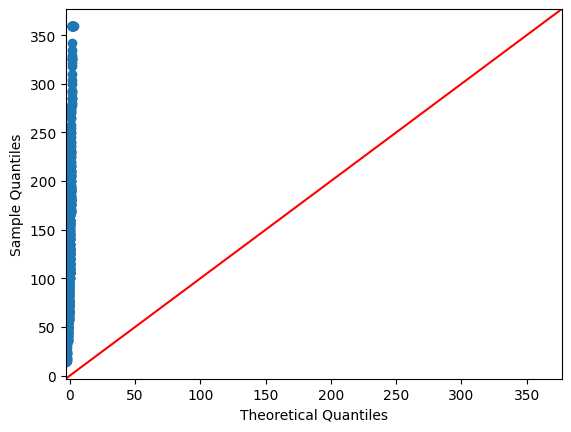

In [26]:
fig = sm.qqplot(df_3['Insulin'], line='45')
plt.show()

> After Formula: DF_4

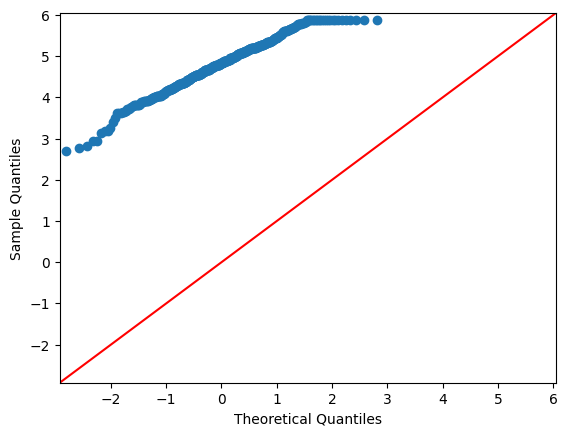

In [27]:
fig = sm.qqplot(df_4['Insulin'], line='45')
plt.show()

Comment

#### H. Similarly detect and correct outliers (step d) in the 'Glucose','BloodPressure' and 'SkinThickness' columns.

> Glucose Column Outliers Detection

In [17]:
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66.0,23,94,28.1,0.167,21,0
1,0,137,40.0,35,168,43.1,2.288,15,1
2,3,78,50.0,32,88,31.0,0.248,26,1
3,2,197,70.0,45,543,30.5,0.158,53,1
4,1,189,60.0,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
399,2,129,74.0,26,205,33.2,0.591,25,0
400,1,140,74.0,26,180,24.1,0.828,23,0
401,1,144,82.0,46,180,46.1,0.335,46,1
402,2,121,70.0,32,95,39.1,0.886,23,0


In [18]:
Q1 = df_2['Glucose'].quantile(0.25)
Q3 = df_2['Glucose'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

Glucose_outliers = df_2[(df_2['Glucose'] < lower_bound) | (df_2['Glucose'] > upper_bound)]
print("Lower Bound is: %f" % (lower_bound))
print("Upper Bound is: %f" % (upper_bound))
print("I found %d outliers after using the IQR approach." % (len(Glucose_outliers)))

44.0
Lower Bound is: 33.000000
Upper Bound is: 209.000000
I found 1 outliers after using the IQR approach.


> Glucose Column Outliers Correction

> BloodPressure Column Outliers Detection

In [19]:
Q1 = df_2['BloodPressure'].quantile(0.25)
Q3 = df_2['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

BloodPressure_outliers = df_2[(df_2['BloodPressure'] < lower_bound) | (df_2['BloodPressure'] > upper_bound)]
print("Lower Bound is: %f" % (lower_bound))
print("Upper Bound is: %f" % (upper_bound))
print("I found %d outliers after using the IQR approach." % (len(BloodPressure_outliers)))

16.0
Lower Bound is: 38.000000
Upper Bound is: 102.000000
I found 7 outliers after using the IQR approach.


> BloodPressure Column Outliers Correction

> SkinThickness Column Outliers Detection

In [20]:
Q1 = df_2['SkinThickness'].quantile(0.25)
Q3 = df_2['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

SkinThickness_outliers = df_2[(df_2['SkinThickness'] < lower_bound) | (df_2['SkinThickness'] > upper_bound)]
print("Lower Bound is: %f" % (lower_bound))
print("Upper Bound is: %f" % (upper_bound))
print("I found %d outliers after using the IQR approach." % (len(SkinThickness_outliers)))

16.0
Lower Bound is: -3.000000
Upper Bound is: 61.000000
I found 1 outliers after using the IQR approach.


> SkinThickness Column Outliers Corection

Comment

#### I. Display the correlation matrix using the seaborn heatmap function between continuous variables; Pregnancies, Glocose, BloodPressure, SkinThickness, Insulin, BMI, Age.

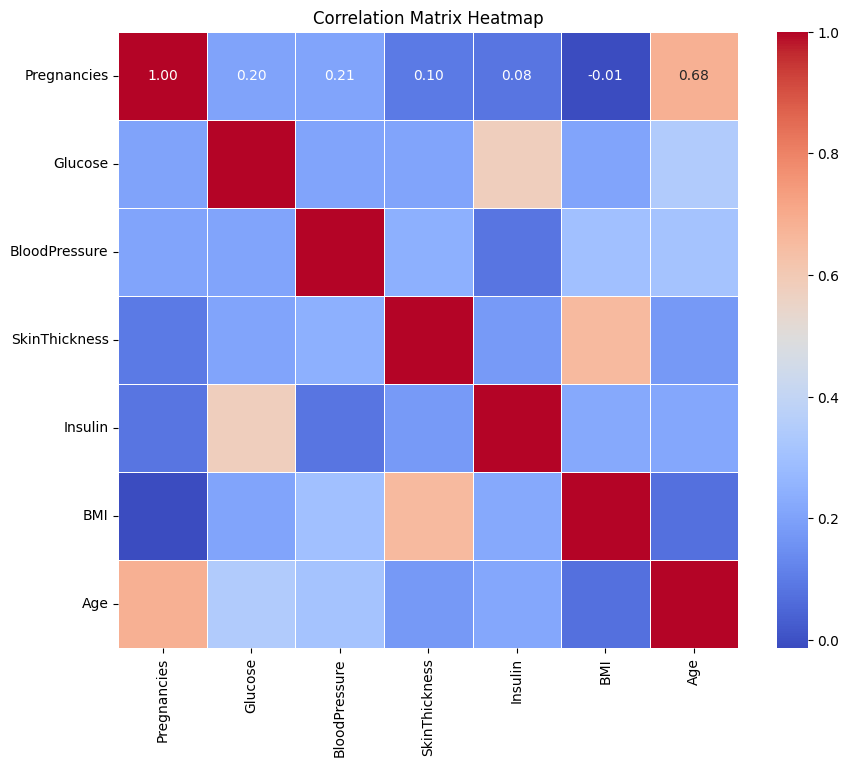

In [25]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
subset_df = df_2[columns]
correlation_matrix = subset_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Question 2: Data Processing

#### A. Group the patients by number of pregnancies, along with their average BloodPressure.

#### B. Group the patients by number of pregnancies, along with the average age, sum of all ages in that group, and the count of patients in that group

#### C. Add a new column named ‘BMI/Age’ with the value of BMI over the Age, without using any loops.

#### D. Without looping the rows, add a new column named ‘risk’ with the following rules:
        a. High: if BMI > 45 and BloodPressure > 100
        b. Medium: if 30 < BMI < 45 and BloodPressure < 100
        c. Low: if BMI < 30
        d. Unknown: otherwise

#### E. The file named ages.csv provides the age group names. Merge the two dataframes by the age, the resulted dataframe must contain all the columns of diabetes.csv, in addition to their age group in the column named ‘AgeGroup’.

#### F. one-hot encode the categorical variable ‘AgeGroup’ and add the resulting columns to the dataframe, and remove AgeGroup.

***